# Coursework

# Module Load

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot figures
import seaborn as sns # plot figuresimport pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')
import keras

## Data Loading

In [2]:
Columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G', 'Class']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv", names = Columns)
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      583 non-null    int64  
 1   Gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   Alkphos  583 non-null    int64  
 5   Sgpt     583 non-null    int64  
 6   Sgot     583 non-null    int64  
 7   TP       583 non-null    float64
 8   ALB      583 non-null    float64
 9   A/G      579 non-null    float64
 10  Class    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
data.isnull().sum() # chack for missing values

Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
A/G        4
Class      0
dtype: int64

In [5]:
data['A/G'].fillna(data['A/G'].mean(), inplace = True)

In [6]:
genderMapping = {'Male': 0,'Female': 1}

data['Gender'] = data['Gender'].map(genderMapping) #handling categorical data

In [7]:
# pd.get_dummies(data['Gender'], prefix = 'Gender').head()

In [8]:
# data = pd.concat([data,pd.get_dummies(data['Gender'], prefix = 'Gender')], axis=1)
# data.drop(columns = ["Gender"], inplace = True)

In [9]:
# data.isnull().sum()

In [10]:
data.describe().T  

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.000000,58.0,90.0
Gender,583.0,0.243568,0.429603,0.0,0.0,0.000000,0.0,1.0
TB,583.0,3.298799,6.209522,0.4,0.8,1.000000,2.6,75.0
DB,583.0,1.486106,2.808498,0.1,0.2,0.300000,1.3,19.7
Alkphos,583.0,290.576329,242.937989,63.0,175.5,208.000000,298.0,2110.0
Sgpt,583.0,80.713551,182.620356,10.0,23.0,35.000000,60.5,2000.0
Sgot,583.0,109.910806,288.918529,10.0,25.0,42.000000,87.0,4929.0
TP,583.0,6.483190,1.085451,2.7,5.8,6.600000,7.2,9.6
ALB,583.0,3.141852,0.795519,0.9,2.6,3.100000,3.8,5.5
A/G,583.0,0.947064,0.318492,0.3,0.7,0.947064,1.1,2.8


In [11]:
X = data.drop(columns = ["Class"])
y = data["Class"]
y.mask(y==2, 0, inplace = True)

**Data Exploration**

Data Exploration

Text(0, 0.5, 'Number')

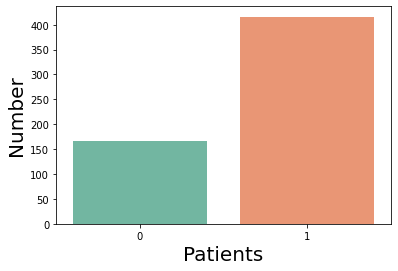

In [60]:
p = sns.countplot(x="Class",data=data, palette = "Set2")
p.set_xlabel("Patients", fontsize = 20)
p.set_ylabel("Number", fontsize = 20)

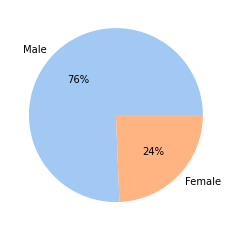

In [61]:
gender_sizes=data.groupby('Gender').size()
labels = ['Male', 'Female']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(gender_sizes, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

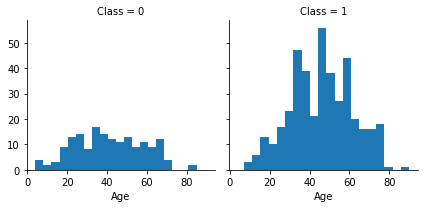

In [62]:
g = sns.FacetGrid(data, col='Class')
g.map(plt.hist, 'Age', bins=20)

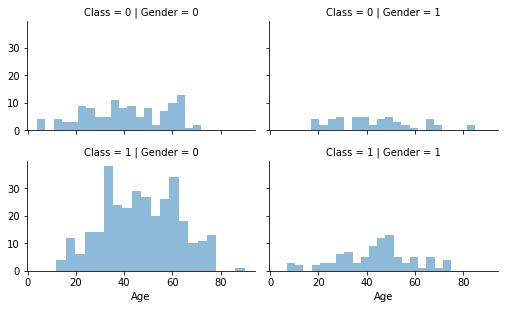

In [63]:
grid = sns.FacetGrid(data, row='Class', col='Gender', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

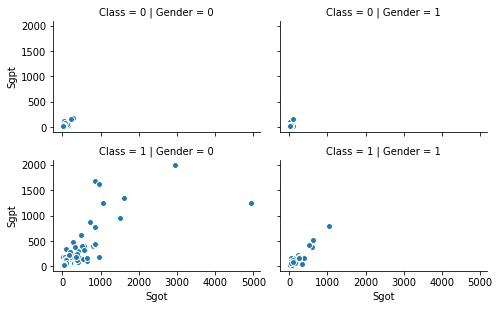

In [64]:
g = sns.FacetGrid(data,  row='Class', col='Gender', height=2.2, aspect=1.6)
g.map(plt.scatter,"Sgot", "Sgpt",  edgecolor="w")

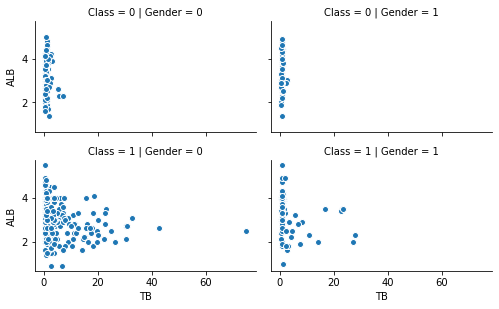

In [65]:
g = sns.FacetGrid(data,  row='Class', col='Gender', height=2.2, aspect=1.6)
g.map(plt.scatter,"TB", "ALB",  edgecolor="w")

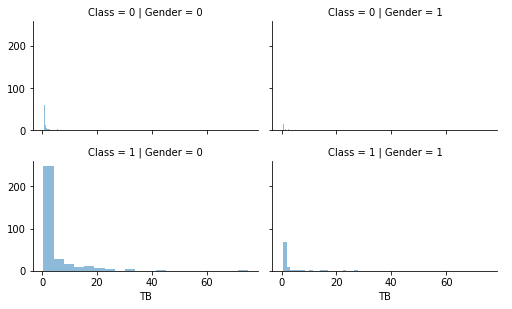

In [66]:
grid = sns.FacetGrid(data, row='Class', col='Gender', height=2.2, aspect=1.6)
grid.map(plt.hist, 'TB', alpha=.5, bins=20)
grid.add_legend()

Feature Engineering

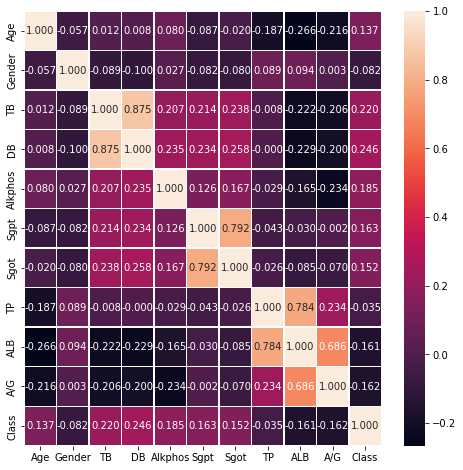

In [67]:
corr = data.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [68]:
corr[abs(corr['Class']) > 0.2]['Class']

TB       0.220208
DB       0.246046
Class    1.000000
Name: Class, dtype: float64

In [69]:
def correl(A,B):
  for i in range(4):
    print("The correlation for {} and {} is:".format(A[i], B[i]))
    print(corr[abs(corr[A[i]]) > 0.5][B[i]])

x1=['TB', 'Sgot', 'TP', 'ALB', 'Age']
y1=['DB', 'Sgpt', 'ALB', 'A/G', 'ALB']
correl(x1, y1)

The correlation for TB and DB is:
TB    0.874618
DB    1.000000
Name: DB, dtype: float64
The correlation for Sgot and Sgpt is:
Sgpt    1.000000
Sgot    0.791966
Name: Sgpt, dtype: float64
The correlation for TP and ALB is:
TP     0.784053
ALB    1.000000
Name: ALB, dtype: float64
The correlation for ALB and A/G is:
TP     0.233904
ALB    0.686322
A/G    1.000000
Name: A/G, dtype: float64


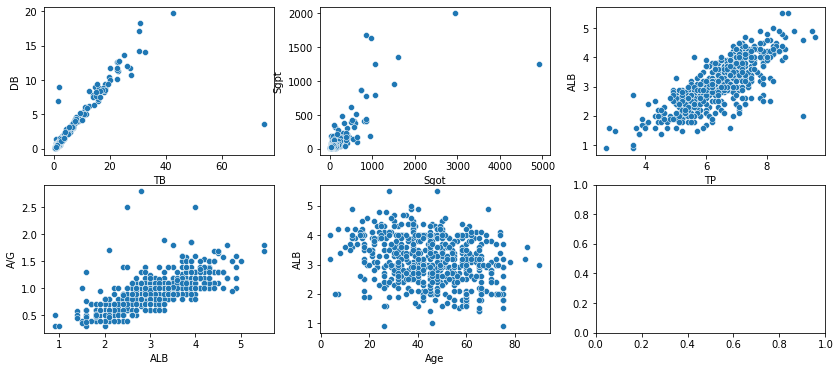

In [70]:
# sns.set_theme(style="darkgrid")
fig, axarr=plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
ax=axarr.flatten()
for i in range(len(x1)):
    sns.scatterplot(data=data, x=x1[i], y=y1[i], ax=ax[i], palette = ['green'])

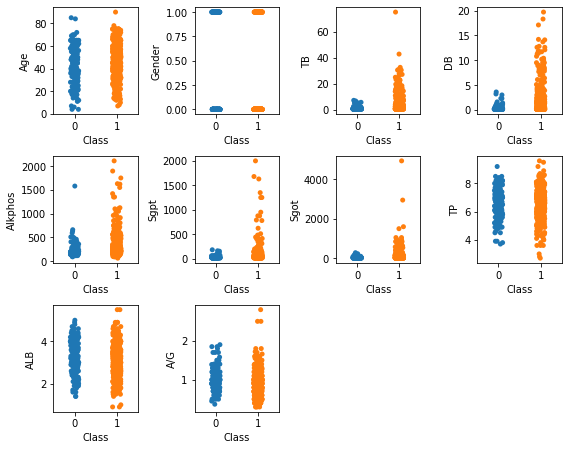

In [71]:
plt.figure(figsize=(8,8), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1

plt.tight_layout()

Outlier handling

Text(0.5, 1.0, 'Visualization of outliers')

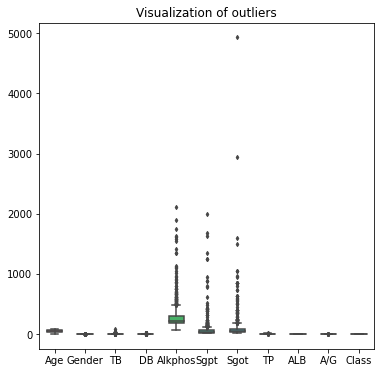

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers")

In [13]:
outlier = (data["Sgot"]>2500)
print("There are {} outliers in your dataset".format(data[outlier]["Class"].count()))

There are 2 outliers in your dataset


In [14]:
data['Sgot'].mask(data['Sgot']>2500, 2500, inplace = True)
#to impute the value of outlier

In [15]:
# data = data[~outlier]    
#for removing the outlier

Text(0.5, 1.0, 'Visualization of outliers')

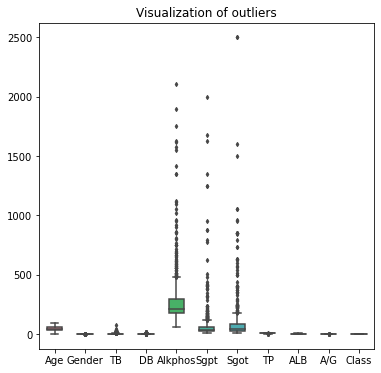

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers")

In [17]:
X = data.drop(columns = ["Class"])
y = data["Class"]
data.shape, X.shape, y.shape

((583, 11), (583, 10), (583,))

Imbalance Dataset handling

In [45]:
print ("number of all feature vectors:", y.size)
print ("number of patient vectors: ", np.sum(y))
print ("number of non patient vectors: ",  y.size-np.sum(y))

number of all feature vectors: 583
number of patient vectors:  416
number of non patient vectors:  167


In [18]:
from imblearn.over_sampling import RandomOverSampler

OS = RandomOverSampler()
osx, osy = OS.fit_resample(X, y)
osx.shape

(832, 10)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(osx, osy ,test_size=0.30,random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler
mmscalar=MinMaxScaler()
x_train_scaled = mmscalar.fit_transform(x_train)
x_test_scaled = mmscalar.transform(x_test)

## Feature Selection

SBS for feature selection

In [79]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

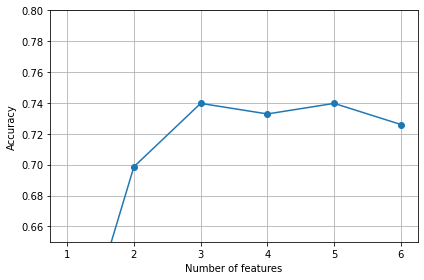

In [80]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(x_train_scaled, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.65, 0.80])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [137]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 4, 5, 6, 7, 9),
 (0, 1, 2, 3, 4, 5, 7, 9),
 (0, 1, 2, 4, 5, 7, 9),
 (0, 1, 4, 5, 7, 9),
 (0, 1, 4, 7, 9),
 (0, 1, 4, 9),
 (0, 1, 4),
 (0, 4),
 (0,)]

Random Forest for Feature Selection

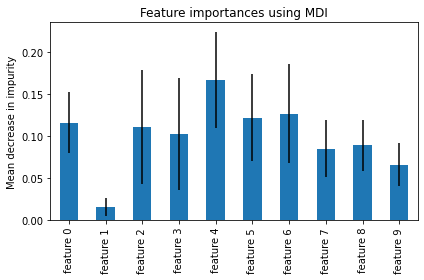

In [138]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(osx.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Choosing selected features

In [21]:
X_selected = osx[['Age', 'TB', 'Alkphos', 'Sgpt', 'TP', 'A/G']]
scalar=MinMaxScaler()
dataset_scaled = scalar.fit_transform(X_selected)

x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(dataset_scaled, osy, test_size=0.3, random_state=0)

## **Decision Tree Model**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_param = DecisionTreeClassifier(random_state = 0)
tree_param.fit(x_train_scaled, y_train)
predict = tree_param.predict(x_test_scaled)
tree_acc_train = tree_param.score(x_train_scaled, y_train)*100
tree_acc_test = tree_param.score(x_test_scaled, y_test)*100

print("Decision Tree Classifier: Train Accuracy {:.2f}%".format(tree_acc_train))
print("Decision Tree Classifier: Test Accuracy {:.2f}%".format(tree_acc_test))

Decision Tree Classifier: Train Accuracy 100.00%
Decision Tree Classifier: Test Accuracy 81.20%


Grid Search Optimization

In [81]:

tree_clf = DecisionTreeClassifier(random_state = 0)
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))}   #Hyperparamter for descision tree
tree_param = GridSearchCV(tree_clf, params, cv=5, scoring = 'accuracy')

tree_param.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [82]:
best_params = tree_param.best_params_
#Best params selected by GridSearchCV
best_params

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [83]:
x_train_scaled.shape

(582, 6)

In [88]:
tree_param = DecisionTreeClassifier(**best_params)
tree_param.fit(x_train_scaled, y_train)
predict = tree_param.predict(x_test_scaled)
tree_acc_train = tree_param.score(x_train_scaled, y_train)*100
tree_acc_test = tree_param.score(x_test_scaled, y_test)*100

print("Decision Tree Classifier: Train Accuracy {:.2f}%".format(tree_acc_train))
print("Decision Tree Classifier: Test Accuracy {:.2f}%".format(tree_acc_test))
# Decision Tree Classifier: Train Accuracy 98.63%
# Decision Tree Classifier: Test Accuracy 84.00%

Decision Tree Classifier: Train Accuracy 89.18%
Decision Tree Classifier: Test Accuracy 82.80%


Accuracy

In [49]:
pred = tree_param.predict(x_test_scaled)

[Text(0.5555555555555556, 0.875, 'X[0] <= 0.474\nentropy = 1.0\nsamples = 582\nvalue = [289, 293]'),
 Text(0.3333333333333333, 0.625, 'X[2] <= 0.344\nentropy = 0.986\nsamples = 293\nvalue = [167, 126]'),
 Text(0.2222222222222222, 0.375, 'X[1] <= 0.039\nentropy = 0.971\nsamples = 278\nvalue = [167, 111]'),
 Text(0.1111111111111111, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.7777777777777778, 0.625, 'X[2] <= 0.271\nentropy = 0.982\nsamples = 289\nvalue = [122, 167]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 0.081\nentropy = 0.993\nsamples = 271\nvalue = [122, 149]'),
 Text(0.5555555555555556, 0.125, '\n  (...)  \n'),
 Text(0.7777777777777778, 0.125, '\n  (...)  \n'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]')]

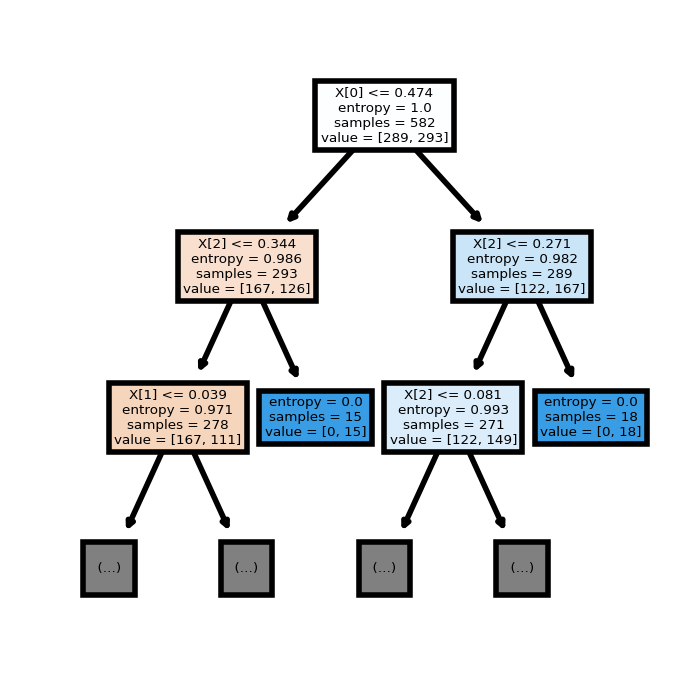

In [181]:
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=400)

tree.plot_tree(tree_param, max_depth = 2, filled = True)

Sensitivity Analysics

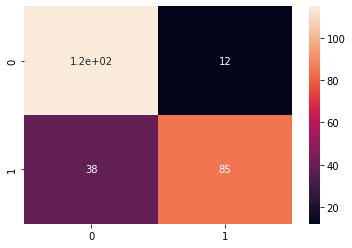

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [51]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, pred)
tp_dt = conf_mat[0][0]
fp_dt = conf_mat[0][1]
fn_dt = conf_mat[1][0]
tn_dt = conf_mat[1][1]
Precision_dt = tp_dt / (tp_dt + fp_dt)
Recall_dt= tp_dt / (tp_dt + fn_dt)
F1_Score_dt = (2 * Precision_dt * Recall_dt) / (Precision_dt + Recall_dt)

In [52]:
path = tree_param.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

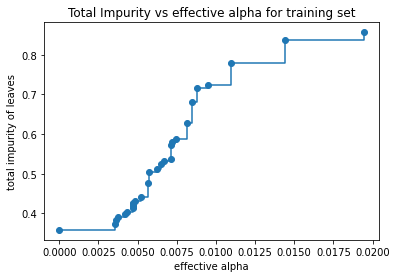

In [53]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [54]:
from sklearn.metrics import roc_auc_score,roc_curve, auc
y_pred_dt = tree_param.predict_proba(x_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

In [55]:
y_probabilities = tree_param.predict_proba(x_test_scaled)[:,1]
false_positive_rate_tree, true_positive_rate_tree, threshold_tree = roc_curve(y_test, y_probabilities)
tree_AUC = roc_auc_score(y_test, tree_param.predict_proba(x_test_scaled)[:, 1])

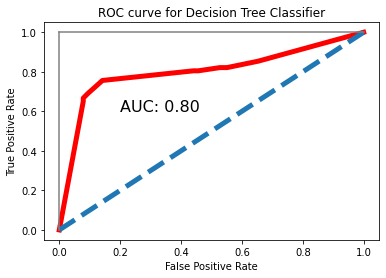

In [56]:
#Plotting ROC Curve
plt.figure(figsize=(6,4))
plt.title('ROC curve for Decision Tree Classifier')
plt.plot(false_positive_rate_tree, true_positive_rate_tree, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(tree_AUC),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Important features

Feature: 0, Score: 31.02817
Feature: 1, Score: 23.08552
Feature: 2, Score: 16.16711
Feature: 3, Score: 14.78648
Feature: 4, Score: 5.97260
Feature: 5, Score: 8.96011


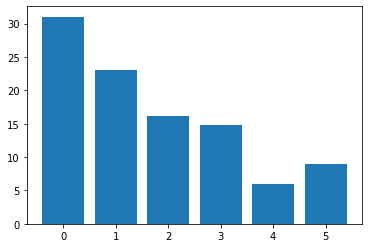

In [57]:
# get the importance scores
importance = tree_param.feature_importances_*100 

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
from matplotlib import pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **Neural Network**

In [58]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

dim = x_train_scaled.shape[1]
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=dim, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.0001), activation='tanh', name = 'layer1'))
    model.add(Dropout(0.25))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.0001), activation='tanh', name = 'layer2'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 16)                112       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 layer2 (Dense)              (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
# fit the model to the training data
history=model.fit(x_train_scaled, Y_train, validation_data=(x_test_scaled, Y_test),epochs=150, batch_size=10, verbose = 0)

In [90]:
_, accuracy = model.evaluate(x_train_scaled, Y_train)
print('Accuracy: %.2f' % (accuracy*100))


19/19 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7062
Accuracy: 70.62


In [91]:
_, accuracy = model.evaluate(x_test_scaled, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7400
Accuracy: 74.00


Hypertuning using keras-tuner

In [63]:
!pip install keras-tuner

In [64]:
import tensorflow as tf
import kerastuner as kt

In [65]:

# define a function to build the keras model
def opt_model(hp):
    # create model
    dim = x_train_scaled.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=dim, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.0001), activation='relu', name = 'layer1'))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dropout(0.25))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.0001), activation='relu', name = 'layer2'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
    return model

In [66]:
tuner = kt.RandomSearch(
                opt_model,
                max_trials=10,
                objective='val_accuracy',
                # Do not resume the previous search in the same directory.
                overwrite=True,
                directory='keras_tuner_liver',
#                      project_name='Patient_liver
)
#---Also used Hyperband-----
# tuner = kt.Hyperband(opt_model, # the hypermodel
#                      objective='val_accuracy', # objective to optimize
#                      max_epochs=10,
#                      factor=3,
#                      # factor which you have seen above 
#                      directory='keras_tuner_liver',
#                      project_name='Patient_liver')

In [67]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [68]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [92]:
tuner.search(x_train_scaled, Y_train, epochs=50, validation_split=0.2, verbose = 0)
best_hp=tuner.get_best_hyperparameters()[0]
best_hp

INFO:tensorflow:Oracle triggered exit


In [93]:
for h_param in [f"units" for i in range(1,4)] + ['learning_rate']:
  print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units 256
units 256
units 256
learning_rate 0.001


In [94]:
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()
h_model.fit(x_train_scaled, Y_train, epochs=200, validation_split=0.2, verbose = 0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 16)                112       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 layer2 (Dense)              (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [101]:
h_eval_dict = h_model.evaluate(x_test_scaled, Y_test, return_dict=True)

8/8 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.7160


In [96]:
h_eval_dict['accuracy']*100

71.60000205039978

In [99]:
_, accuracy = h_model.evaluate(x_train_scaled, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

19/19 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7079
Accuracy: 70.79


In [100]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


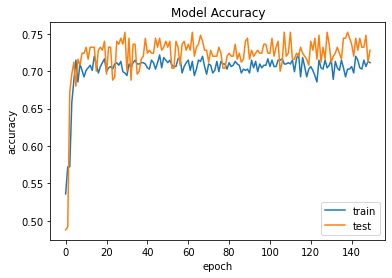

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

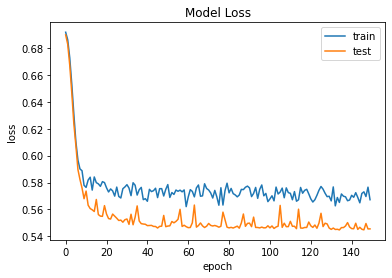

In [199]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [98]:
# generate classification report using predictions for categorical model
from sklearn.metrics import accuracy_score

NN_predict = np.argmax(model.predict(x_test_scaled), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, NN_predict))

Results for Categorical Model
0.74


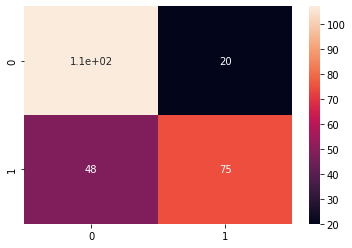

In [202]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, NN_predict), annot=True)

In [102]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, NN_predict)
tp_nn = conf_mat[0][0]
fp_nn = conf_mat[0][1]
fn_nn = conf_mat[1][0]
tn_nn = conf_mat[1][1]
Precision_nn = tp_nn / (tp_nn + fp_nn)
Recall_nn= tp_nn / (tp_nn + fn_nn)
F1_Score_nn = (2 * Precision_nn * Recall_nn) / (Precision_nn + Recall_nn)

In [104]:
from sklearn.metrics import roc_curve
# y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, NN_predict)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

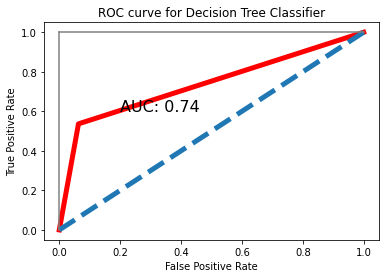

In [105]:
#Plotting ROC Curve
plt.figure(figsize=(6,4))
plt.title('ROC curve for Decision Tree Classifier')
plt.plot(fpr_keras, tpr_keras, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(auc_keras),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Comparisons

In [206]:
#decision tree param
y_pred_dt = tree_param.predict_proba(x_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

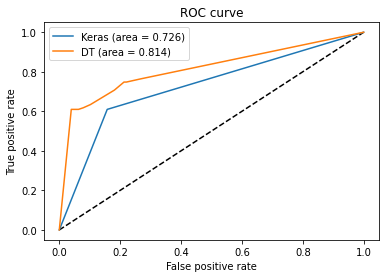

In [207]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.3f})'.format(auc_dt))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

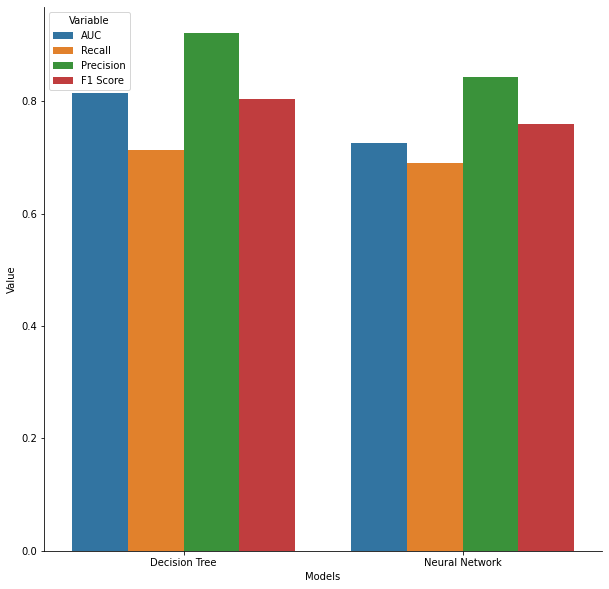

In [217]:
df = pd.DataFrame({
    'Models': ['Decision Tree', 'Neural Network'],
    'AUC': [auc_dt, auc_keras],
    'Recall': [Recall_dt, Recall_nn],
    'Precision': [Precision_dt, Precision_nn],
    'F1 Score' : [F1_Score_dt, F1_Score_nn]
})
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Models').rename(columns=str.title)
sns.barplot(x='Models', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)